In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
NUM_ITERATIONS = np.array([0, 20000, 40000, 60000, 80000, 100000])
result_csv_files = [
    '../eval_results/test_base_metrics.csv',
    '../eval_results/test_20000_metrics.csv',
    '../eval_results/test_40000_metrics.csv',
    '../eval_results/test_60000_metrics.csv',
    '../eval_results/test_80000_metrics.csv',
    '../eval_results/test_100000_metrics.csv',
]

In [48]:
from collections import defaultdict

smape_dict = defaultdict(list)
mase_dict = defaultdict(list)
rmse_dict = defaultdict(list)
wql_dict = defaultdict(list)
for file in result_csv_files:
    print('Processing file:', file)
    # read the CSV file
    df = pd.read_csv(file)
    # get the smape column
    dyst = df['dataset']
    for i in range(len(df)):
        smape_dict[dyst[i]].append(df['sMAPE'][i])
        mase_dict[dyst[i]].append(df['MASE'][i])
        rmse_dict[dyst[i]].append(df['RMSE'][i])
        wql_dict[dyst[i]].append(df['WQL'][i])


Processing file: ../eval_results/test_base_metrics.csv
Processing file: ../eval_results/test_20000_metrics.csv
Processing file: ../eval_results/test_40000_metrics.csv
Processing file: ../eval_results/test_60000_metrics.csv
Processing file: ../eval_results/test_80000_metrics.csv
Processing file: ../eval_results/test_100000_metrics.csv


In [49]:
print(smape_dict)

defaultdict(<class 'list'>, {'AnishchenkoAstakhov': [0.8866732815901438, 0.4992362583676973, 0.4899630869428317, 0.5031595875819524, 0.596635306874911, 0.5914593786001204], 'Blasius': [0.4192391633987427, 0.3389375060796737, 0.3309266567230224, 0.2614355434974035, 0.2980596596995989, 0.2564451284706592], 'CellCycle': [0.676445538798968, 0.4993000129858652, 0.4981935173273086, 0.5142790178457896, 0.4820255041122437, 0.5355919202168783], 'Chen': [0.6137921760479609, 0.8350045929352444, 0.7301918417215347, 0.8376327107350031, 0.8742876003185908, 0.8728566815455755], 'CircadianRhythm': [0.2739308707416057, 0.1115462683141231, 0.1342993885278701, 0.1306174017488956, 0.1354390911757946, 0.1283351331949234], 'CoevolvingPredatorPrey': [0.3265444785356521, 0.2625809622307618, 0.2355905752629041, 0.2139720053722461, 0.2901173587888479, 0.2403949753691753], 'ForcedBrusselator': [0.6704123492042224, 0.224292238553365, 0.1827983111143112, 0.2270392440259456, 0.1989415275553862, 0.1831292156130075],

In [50]:
list(smape_dict.keys())

['AnishchenkoAstakhov',
 'Blasius',
 'CellCycle',
 'Chen',
 'CircadianRhythm',
 'CoevolvingPredatorPrey',
 'ForcedBrusselator',
 'ForcedFitzHughNagumo',
 'GenesioTesi',
 'HastingsPowell',
 'HyperCai',
 'HyperJha',
 'HyperLorenz',
 'HyperPang',
 'HyperYangChen',
 'Laser',
 'LidDrivenCavityFlow',
 'LiuChen',
 'LorenzStenflo',
 'LuChen',
 'NewtonLiepnik',
 'PehlivanWei',
 'Qi',
 'QiChen',
 'RikitakeDynamo',
 'Rossler',
 'SprottA',
 'SprottC',
 'SprottJ',
 'SprottJerk',
 'SprottMore',
 'StickSlipOscillator',
 'Torus',
 'TurchinHanski',
 'YuWang',
 'YuWang2']

In [90]:
def plot_metrics_dict(metrics_dict, title, top_n=None, log_scale=True):
    fig, ax = plt.subplots(figsize=(5, 5))
    for key in list(metrics_dict.keys())[:top_n]:
        values = metrics_dict[key]
        if NUM_ITERATIONS is not None:
            ax.plot(NUM_ITERATIONS, values, '.-', alpha=0.5, label=key)
        else:
            ax.plot(values, '.-', alpha=0.5, label=key)
        if log_scale:
            ax.set_yscale('log')
        ax.set_xlabel('Iterations')
    ax.set_ylabel(title)
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax.set_title(title)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

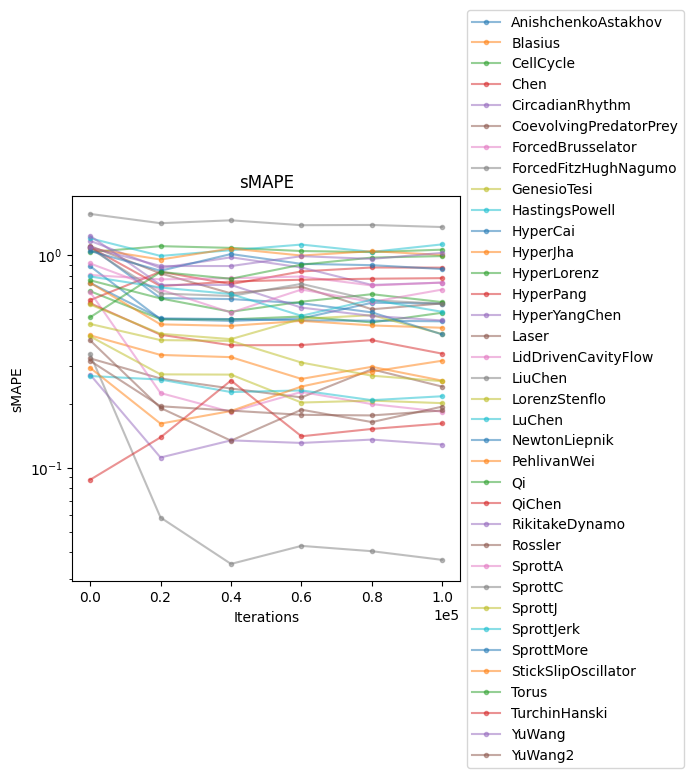

In [91]:
plot_metrics_dict(smape_dict, 'sMAPE', top_n=None)

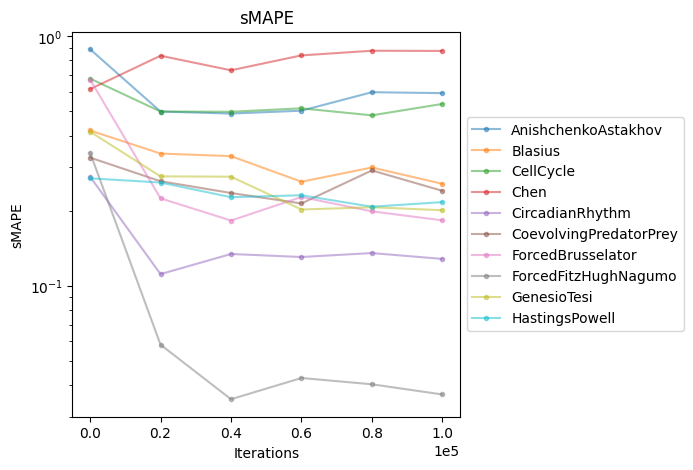

In [92]:
plot_metrics_dict(smape_dict, 'sMAPE', top_n=10)

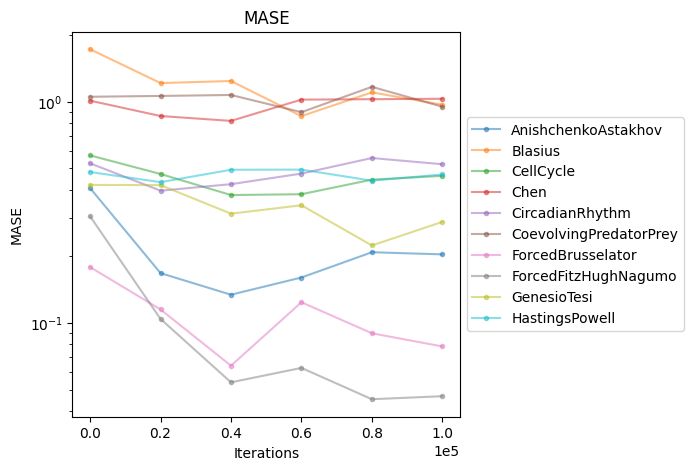

In [93]:
plot_metrics_dict(mase_dict, 'MASE', top_n=10)

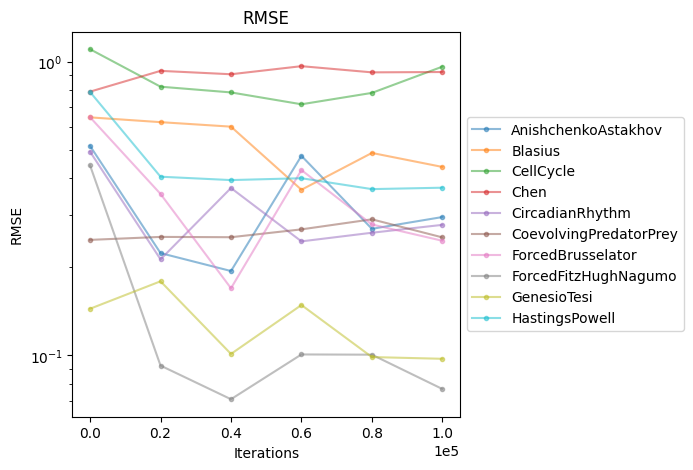

In [94]:
plot_metrics_dict(rmse_dict, 'RMSE', top_n=10)

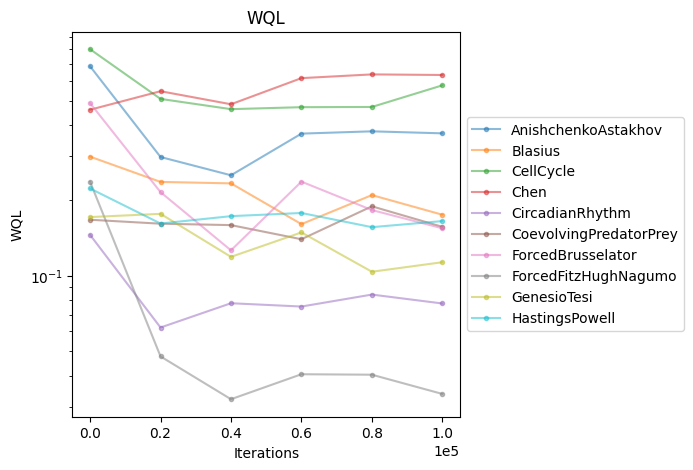

In [95]:
plot_metrics_dict(wql_dict, 'WQL', top_n=10)

In [96]:
def plot_agg_metrics_dict(all_metrics_dict, title='Averaged Metrics', top_n=None, log_scale=True):
    fig, ax = plt.subplots(figsize=(5, 5))
    for metric_name, metrics_dict in all_metrics_dict.items():
        print("metric: ", metric_name)
        avg_values = np.mean(list(metrics_dict.values())[:top_n], axis=0)
        print(avg_values.shape)
        if NUM_ITERATIONS is not None:
            ax.plot(NUM_ITERATIONS, avg_values, '.-', alpha=0.5, label=metric_name)
        else:
            ax.plot(avg_values, '.-', alpha=0.5, label='Average')
    if log_scale:
        ax.set_yscale('log')
    ax.set_xlabel('Iterations')
    ax.set_ylabel(title)
    ax.set_title(title)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [97]:
all_metrics_dict = {
    'sMAPE': smape_dict,
    'MASE': mase_dict,
    'RMSE': rmse_dict,
    'WQL': wql_dict,
}

metric:  sMAPE
(6,)
metric:  MASE
(6,)
metric:  RMSE
(6,)
metric:  WQL
(6,)


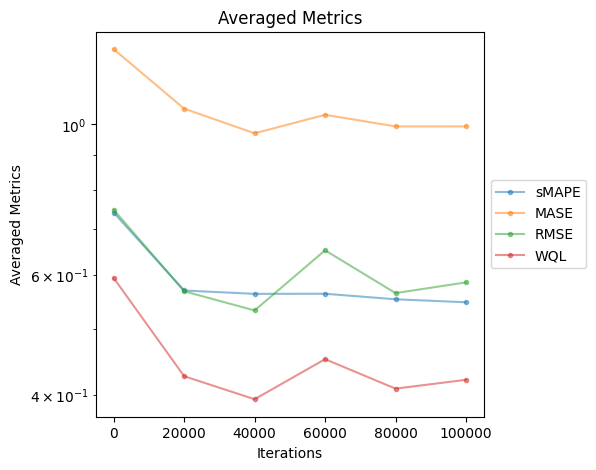

In [98]:
plot_agg_metrics_dict(all_metrics_dict, 'Averaged Metrics', top_n=None, log_scale=True)

In [109]:
from dysts.flows import Lorenz

model = Lorenz()
model.gamma = 1
model.ic = np.array([0.1, 0.0, 5])
sol = model.make_trajectory(1024)

In [119]:
sol_x = sol[:, 0]

In [113]:
import torch
from chronos_dysts.pipeline import ChronosPipeline

/stor/work/AMDG_Gilpin_Summer2024/miniconda3/envs/chronos-dysts/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [124]:
# Load model from checkpoint
model_id = "/stor/work/AMDG_Gilpin_Summer2024/checkpoints/checkpoint-final"
device = "cpu"
torch_dtype = getattr(torch, "bfloat16")
print(f"Loading Chronos checkpoint: {model_id} onto device: {device}")
pipeline = ChronosPipeline.from_pretrained(
    model_id,
    device_map=device,
    torch_dtype=torch_dtype,
)

Loading Chronos checkpoint: /stor/work/AMDG_Gilpin_Summer2024/checkpoints/checkpoint-final onto device: cpu


In [140]:
context_length = 512
prediction_length = 64

In [141]:
# TODO: this takes a long time, how about we multiprocess it?
# NOTE: about 2.5 min for 1 sample on CPU, seemingly scales linearly with num_samples
forecast = pipeline.predict(
    context=torch.tensor(sol_x[:context_length]),
    prediction_length=prediction_length,
    num_samples=20,
)

In [134]:
forecast.shape

torch.Size([1, 1, 64])

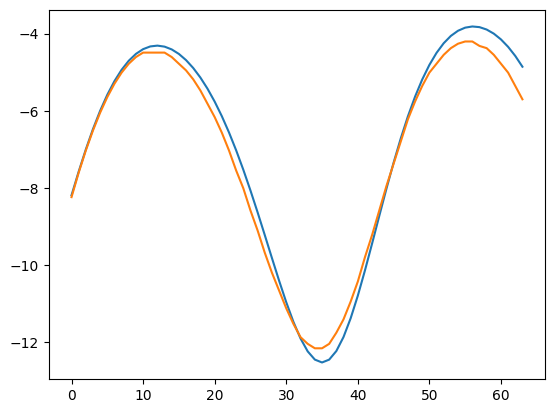

In [139]:
plt.plot(sol_x[context_length:context_length + prediction_length], label="True")
plt.plot(forecast.squeeze(), label="Forecast")

In [153]:
all_forecasts = forecast.squeeze().T
print(all_forecasts.shape)

torch.Size([64, 20])


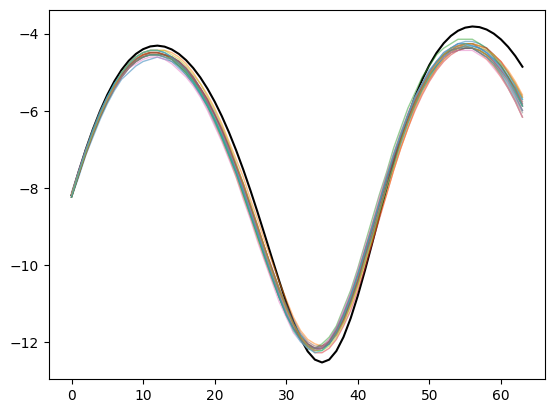

In [159]:
plt.plot(sol_x[context_length:context_length + prediction_length], color='k', label="True");
plt.plot(all_forecasts, alpha=0.5, linewidth=1, label="Forecast");